In [1]:
from utils.initialisation import DenseLayer
from utils.feed import feed_forward, back_prop
from utils.loss import  get_loss
from utils.activation import get_activation
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import utils.plotting_helper as hplt

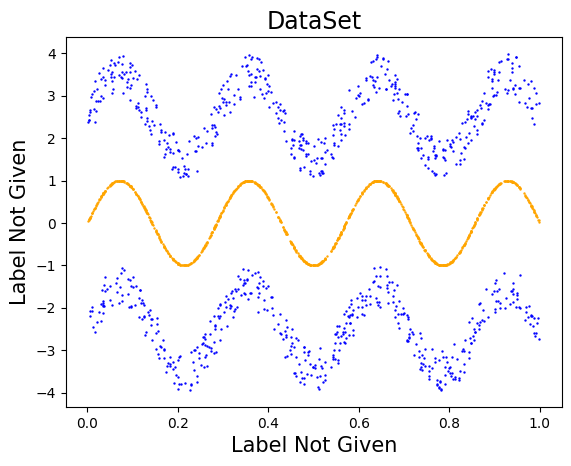

In [3]:
## Dataset Generation

'''
m : Number of data points 
X : np-array of shape (m,2) (x_true,y_true)
a : random integer used in making of y_true

Function used for y_true:
>>>>>>       X[:,1] = sin(a*X[:,0]*pi)

noise : a 1-d numpy array of size 1000 to add noise to the dataset
Y : a 1-d numpy boolean array of size 1000 used to determine whether positive noise is added or negative noise, later used in classification any datapoint
with 1/0 with 1 depicting noise begin added and 0 represent noise been subtracted.
'''

m = 1000
X = np.random.rand(m, 2)
a = np.random.randint(1,10)
X[:,1] = np.sin(a*X[:,0]*np.pi) ## Sin Function
plt.figure()
hplt.scatter_plot(X[:,0], X[:,1],c='orange',title = "DataSet", label = "Sin Wave") ## Plotting the sin function value

## Adding Noise to y_true

noise = np.random.rand(m,1) + 2
Y = np.random.choice(a=[False, True], size=(m,1))
noise = (noise * Y) + (-1*noise*(Y==False)) ## Function so that noise is either made positive or negative.
X[:,1] = X[:,1] + noise[:,0] ## Adding noise to y_true
Y = Y*1 ## Y used of classification

hplt.scatter_plot(X[:,0], X[:,1],c='blue',title = "DataSet", show_plot = True, label = "y_true") ## Plotting the y_true with noise added
##plt.legend()
##plt.show()

In [3]:
'''
Shapes
>>>>>>>>>>>>>>>>>>>>
    x_train : (800,2)
    y_train : (800,1)
    x_test : (200,2)
    y_test : (200,1)

'''
x_train = X[:800,:]
y_train = Y[:800,:]
x_test = X[800:,:]
y_test = Y[800:,:]

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(800, 2) (200, 2)
(800, 1) (200, 1)


In [4]:
### Training of SingleNode Perceptron Node

'''
weight : a numpy array to store weight at each iteration. 
dweight : a numpy array to store derivative weight at each iteration
'''

iteration = 20000
learning_rate = 0.00001
w1,b1 = DenseLayer(2,1)
weight = [w1]
bias = [b1]
dweight = [np.zeros((2,1))]
dbias = []
da = []
daL = []

for _ in tqdm(range(iteration)):
    z1,a1=feed_forward(x_train,w1,b1,'sigmoid')
    da_next = (a1-y_train)
    dw1, db1, da1 = back_prop(x_train,w1,a1,da_next,'sigmoid')
    w1 -= learning_rate*dw1
    b1 -= learning_rate*db1
    dweight.append(dw1)
    weight.append(w1.copy())
    dbias.append(db1)
    bias.append(b1.copy())
    da.append(da1)
    daL.append(da_next)
    
weight = np.array(weight)
dweight = np.array(dweight)
dbias = np.array(dbias)
da = np.array(da)
daL = np.array(daL)

100%|██████████| 20000/20000 [00:03<00:00, 6216.21it/s]


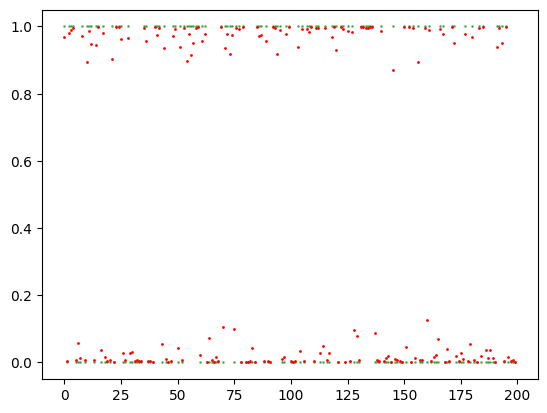

In [5]:
### Prediction 
z2,y_pred = feed_forward(x_test,w1,b1,'sigmoid')

## Plotting Prediction and Actual
plt.scatter(range(x_test.shape[0]), y_test, c = 'green', alpha=0.5,s=1)
plt.scatter(range(x_test.shape[0]), y_pred, c = 'red',s=1)

plt.show()

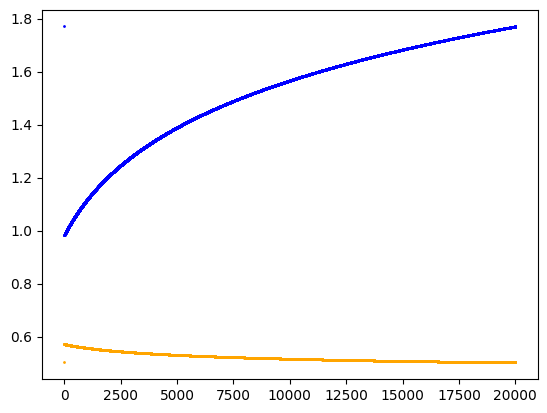

In [6]:
plt.scatter(np.arange(iteration+1), weight[:,0,0],c='orange',s=1) ## Plotting the sin function value
plt.scatter(np.arange(iteration+1), weight[:,1,0],c='blue',s=1) ## Plotting the sin function value

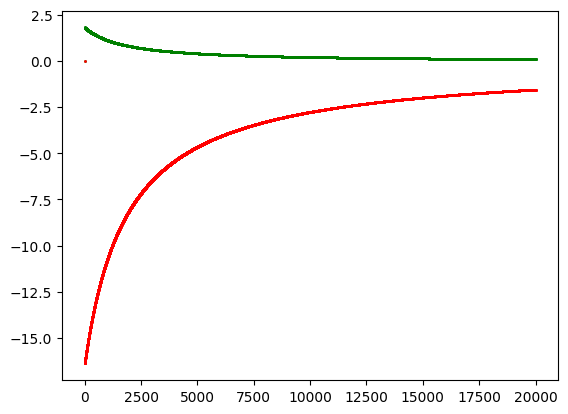

In [7]:
plt.scatter(np.arange(iteration+1), dweight[:,0,0],c='green',s=1)
plt.scatter(np.arange(iteration+1), dweight[:,1,0],c='red',s=1)

In [8]:
dbias.shape

(20000, 1)

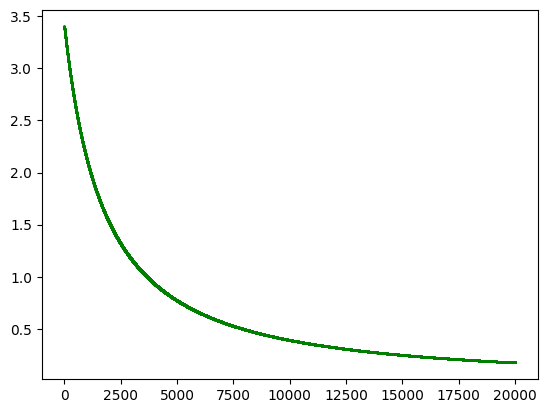

In [9]:
plt.scatter(np.arange(iteration), dbias[:,0],c='green',s=1)
